In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [34]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [35]:
# Initialization of the neural network parameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters


In [36]:
# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2



In [37]:
# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

In [38]:
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

In [39]:
# Model to learn from the diabetes dataset
diabetes_data = pd.read_csv("diabetes.csv")

In [40]:
# Split the dataset into input features (X) and target variable (Y)
X = diabetes_data.drop("Outcome", axis=1).values.T
Y = diabetes_data["Outcome"].values.reshape(1, -1)

In [41]:
# Define the neural network architecture
inputFeatures = X.shape[0]
neuronsInHiddenLayers = 4
outputFeatures = 1


In [42]:
# Initialize the parameters
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)


In [43]:
# Define the training hyperparameters
learningRate = 0.01
epochs = 1500


In [44]:
# Lists to store the cost at each epoch for plotting
costs = []


In [45]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    cost, cache, _ = forwardPropagation(X, Y, parameters)
    
    # Backward propagation
    gradients = backwardPropagation(X, Y, cache)
    
    # Update parameters
    parameters = updateParameters(parameters, gradients, learningRate)
    
    # Store the cost
    costs.append(cost)
    
    # Print the cost every 100 epochs
    if epoch % 100 == 0:
        print(f"Cost after epoch {epoch}: {cost}")

Cost after epoch 0: 1.392193770618196
Cost after epoch 100: 0.6736783759103703
Cost after epoch 200: 0.6712471842230828
Cost after epoch 300: 0.6690203515281397
Cost after epoch 400: 0.6669792601756073
Cost after epoch 500: 0.6651081536758452
Cost after epoch 600: 0.6633905840243733
Cost after epoch 700: 0.6618102513530962
Cost after epoch 800: 0.6603520403640872
Cost after epoch 900: 0.6590135072261506
Cost after epoch 1000: 0.6578097547856544
Cost after epoch 1100: 0.6567356553541971
Cost after epoch 1200: 0.6557714497651083
Cost after epoch 1300: 0.6549013969810292
Cost after epoch 1400: 0.6541141485902512


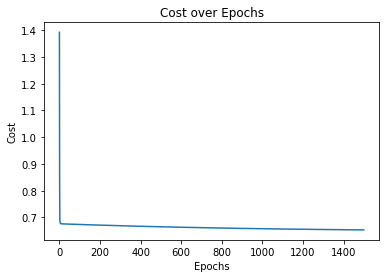

In [46]:
# Plot the cost over epochs
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost over Epochs")
plt.show()

In [52]:

# Predict function
def predict(X, parameters):
    _, _, A2 = forwardPropagation(X, None, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions

In [53]:
# Make predictions on the training set
train_predictions = predict(X, parameters)


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'